In [6]:
import numpy as np
from scipy.optimize import fsolve
#dr/dt=r(a-b*f)
#df/dt=f(g*r-d)
#x=[r,f]

params=[1,1,1,1]
a, b, g, d = params

F=lambda x: np.array([x[0]*(a-b*x[1]),x[1]*(g*x[0]-d)])

h=0.1

T=1
N=int(T/h)+1

X0=[0.7, 1.3]

X1=np.empty((N,2))
X2=np.empty((N,2))
X3=np.empty((N,2))
X4=np.empty((N,2))

X1[0]=X0
X2[0]=X0
X3[0]=X0
X4[0]=X0

for i in range(N-1):
  #explicit Euler method
  X1[i+1]=X1[i]+h*F(X1[i])

  #implicit Euler method
  X2[i+1]=fsolve(lambda y: y-h*F(y)-X2[i], X2[i])

  #Crank Nicholson
  X3[i+1]=fsolve(lambda y: y-h*F(0.5*(y+X3[i]))-X3[i], X3[i])

  #Runge-Kutta 4th order
  k1=h*F(X4[i])
  k2=h*F(X4[i]+0.5*k1)
  k3=h*F(X4[i]+0.5*k2)
  k4=h*F(X4[i]+k3)
  X4[i+1]=X4[i]+(k1+2*k2+2*k3+k4)/6

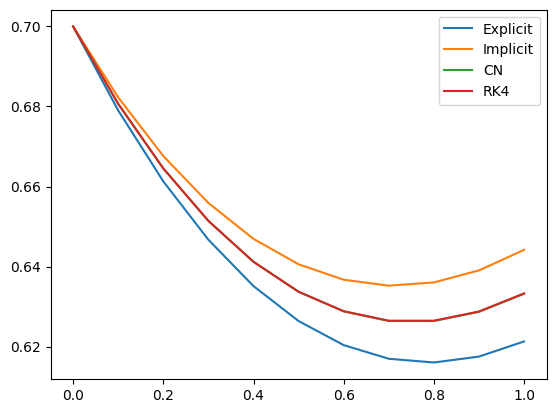

In [9]:
import matplotlib.pyplot as plt

t=h*np.arange(N)
k=0
plt.plot(t,X1[:,k],t,X2[:,k],t,X3[:,k],t,X4[:,k])
plt.legend({'Explicit','Implicit','CN','RK4'})

In [10]:
from scipy.integrate import odeint

F1=lambda x,t:F(x)
X5=odeint(F1,X0,t)

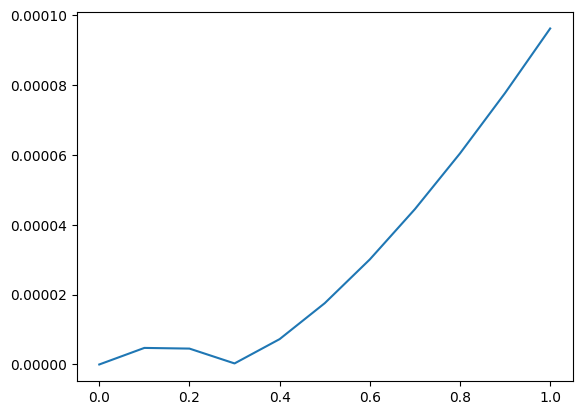

In [16]:
k=0
plt.plot(t,abs(X5[:,k]-X3[:,k]))